In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf


In [2]:
start = '2000-01-01'
end = '2022-12-31'


df = yf.download('TATAMOTORS.NS', start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-26,380.25,390.700012,375.200012,384.799988,382.424286,16979026
2022-12-27,390.00,397.450012,388.500000,394.149994,391.716553,14372461
2022-12-28,394.00,395.899994,390.399994,391.299988,388.884155,8443917
2022-12-29,389.00,390.000000,383.049988,385.899994,383.517487,15627403
2022-12-30,391.00,392.200012,387.000000,387.950012,385.554840,9198673


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,39.744186,41.631748,39.744186,41.535931,32.728165,3528277
2000-01-04,41.583839,41.967102,39.475903,39.897491,31.437160,3544397
2000-01-05,37.176334,41.737144,37.176334,40.865227,32.199688,5849540
2000-01-06,41.200577,44.055874,41.200577,42.561157,33.535988,10274966
2000-01-07,42.925255,45.972179,42.752785,45.972179,36.223694,11477451


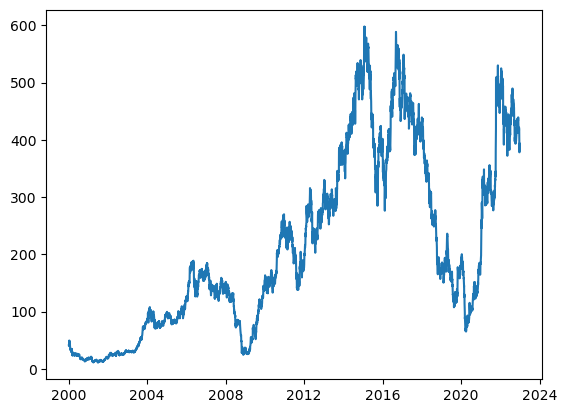

In [5]:
plt.plot(df.Close)

In [6]:
ma50= df.Close.rolling(50).mean()
ma150= df.Close.rolling(150).mean()

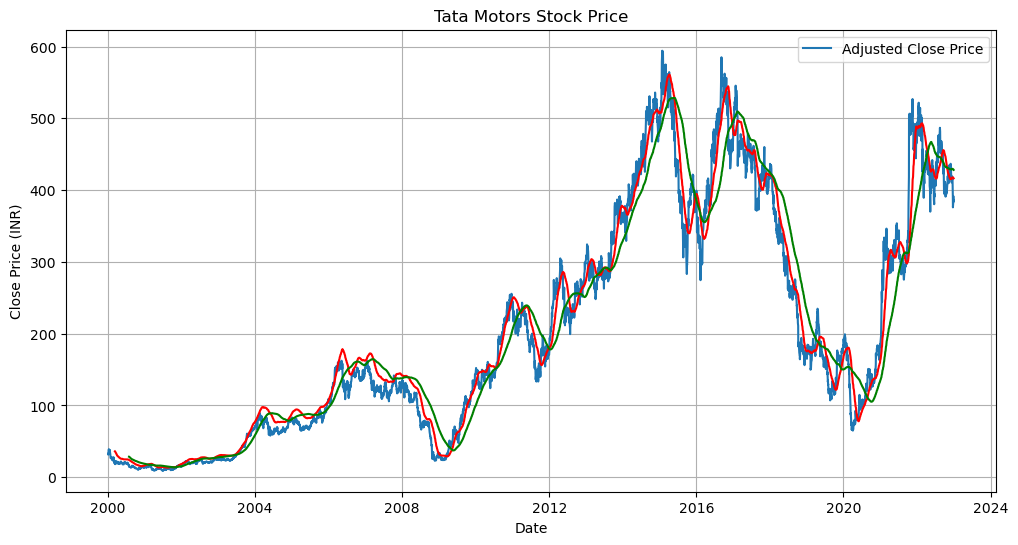

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Adj Close'], label='Adjusted Close Price')
plt.plot(ma50, 'r')
plt.plot(ma150, 'g')
plt.title('Tata Motors Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
df.head()
df.shape

(5748, 6)

In [9]:
#spliting data into training and testin

data_training= pd.DataFrame(df['Adj Close'][0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df['Adj Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(4023, 1)
(1725, 1)


In [10]:
data_training.head()

,Adj Close
Date,
2000-01-03,32.728165
2000-01-04,31.437160
2000-01-05,32.199688
2000-01-06,33.535988
2000-01-07,36.223694


In [11]:
data_testing.head()

,Adj Close
Date,
2016-01-08,351.026276
2016-01-11,357.831238
2016-01-12,352.665436
2016-01-13,362.202301
2016-01-14,351.970032


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [13]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.04047616],
       [0.03826991],
       [0.03957302],
       ...,
       [0.62025044],
       [0.60573503],
       [0.56779141]])

In [14]:
x_train =[]
y_train= []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train , y_train = np.array(x_train) , np.array(y_train)

In [43]:
x_train.shape

(3923, 100, 1)

In [16]:
#ML model

from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [17]:
model = Sequential()
model.add(LSTM(units=50 , activation='relu', return_sequences = True , input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60 , activation='relu', return_sequences = True ))
model.add(Dropout(0.3))




model.add(LSTM(units=80 , activation='relu', return_sequences = True ))
model.add(Dropout(0.4))




model.add(LSTM(units=120 , activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units= 1))

C:\Users\tikul\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 53s 321ms/step - loss: 0.0337
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0043
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 30s 243ms/step - loss: 0.0038
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 23s 183ms/step - loss: 0.0037
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 23s 189ms/step - loss: 0.0034
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 23s 187ms/step - loss: 0.0029
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 23s 183ms/step - loss: 0.0032
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 23s 184ms/step - loss: 0.0028
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 22s 175ms/step - loss: 0.0024
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 20s 159ms/step - loss: 0.0031
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 20s 165ms/step - loss: 0.0026
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 20s 159ms/step - loss: 0.0025
Epoch 13/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step - loss: 0.0025
Epoch 14/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - loss: 0.0024
Epoch 15/50
123

In [20]:
model.save('keras_model.h5')

In [21]:
data_testing.head()

,Adj Close
Date,
2016-01-08,351.026276
2016-01-11,357.831238
2016-01-12,352.665436
2016-01-13,362.202301
2016-01-14,351.970032


In [22]:
past_100_days= data_training.tail(100)

In [23]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [24]:
final_df.head()

,Adj Close
0,366.722382
1,352.864166
2,347.102234
3,352.913818
4,353.758209


In [25]:
input_data= scaler.fit_transform(final_df)
input_data

array([[0.5802456 ],
       [0.55360383],
       [0.54252678],
       ...,
       [0.62285059],
       [0.61253341],
       [0.61645013]])

In [26]:
input_data.shape

(1825, 1)

In [27]:
x_test= []
y_test= []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])



In [28]:
x_test,y_test= np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(1725, 100, 1)
(1725,)


In [29]:
#predictions


y_predicted = model.predict(x_test)



54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step


In [30]:
y_predicted.shape

(1725, 1)

In [31]:
y_test

array([0.55007057, 0.56315279, 0.55322178, ..., 0.62285059, 0.61253341,
       0.61645013])

In [32]:
y_predicted

array([[0.5640768 ],
       [0.55485666],
       [0.5451788 ],
       ...,
       [0.5948295 ],
       [0.5881561 ],
       [0.58278954]], dtype=float32)

In [33]:
scaler.scale_

array([0.00192245])

In [34]:
scale_factor=1/0.00192245

y_predicted = y_predicted* scale_factor
y_test = y_test * scale_factor

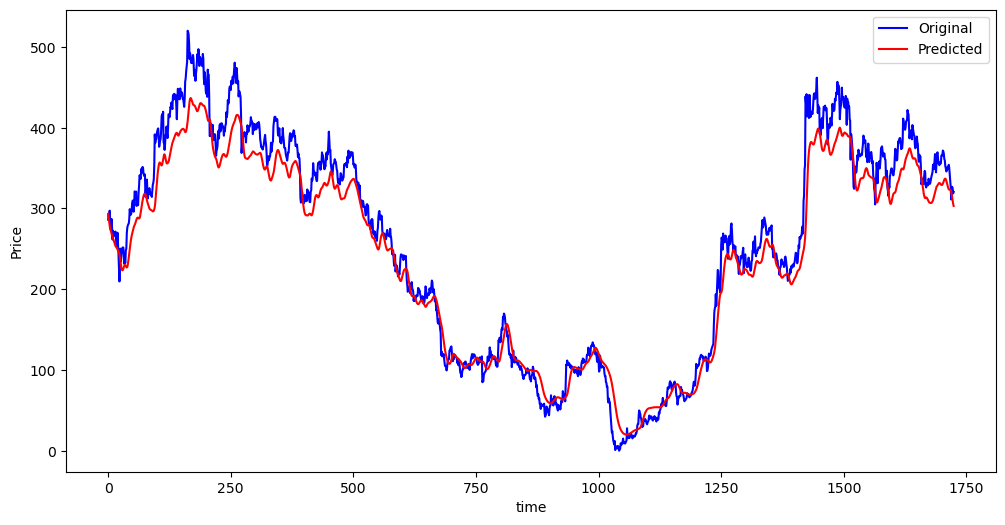

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(y_test,'b', label='Original')
plt.plot(y_predicted,'r', label='Predicted')
plt.xlabel('time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error

# Calculate the RMSE

rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 29.290487951899735
